In [1]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec

from utils import *
from utilsPCA import *
from plotting import *
from efficiency import *

import matplotlib as mpl

mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 
mpl.rc('axes', labelsize=16, titlesize=20)

#plt.style.use(hep.style.CMS)
%matplotlib inline

In [2]:
C = 29.9792458 #cm/ns

In [3]:
path = '/eos/user/w/wredjeb/HGCAL/TICLv4Linking/Timing/NtuplesTiming/'
import os
files = os.listdir(path)
print([f for f in files if ('sys' not in f and '15719812' in f)])

['new_ntuples_15719812_0.root', 'new_ntuples_15719812_10.root', 'new_ntuples_15719812_11.root', 'new_ntuples_15719812_12.root', 'new_ntuples_15719812_13.root', 'new_ntuples_15719812_14.root', 'new_ntuples_15719812_17.root', 'new_ntuples_15719812_18.root', 'new_ntuples_15719812_2.root', 'new_ntuples_15719812_22.root', 'new_ntuples_15719812_23.root', 'new_ntuples_15719812_26.root', 'new_ntuples_15719812_27.root', 'new_ntuples_15719812_28.root', 'new_ntuples_15719812_29.root', 'new_ntuples_15719812_3.root', 'new_ntuples_15719812_30.root', 'new_ntuples_15719812_32.root', 'new_ntuples_15719812_34.root', 'new_ntuples_15719812_35.root', 'new_ntuples_15719812_36.root', 'new_ntuples_15719812_37.root', 'new_ntuples_15719812_38.root', 'new_ntuples_15719812_39.root', 'new_ntuples_15719812_4.root', 'new_ntuples_15719812_40.root', 'new_ntuples_15719812_41.root', 'new_ntuples_15719812_42.root', 'new_ntuples_15719812_43.root', 'new_ntuples_15719812_45.root', 'new_ntuples_15719812_48.root', 'new_ntuple

In [4]:
file_simtrackstersSC = [path+f+":ticlNtuplizer/simtrackstersSC" for f in files if ('sys' not in f and '15719812' in f)]
file_simtrackstersCP = [path+f+":ticlNtuplizer/simtrackstersCP" for f in files if ('sys' not in f and '15719812' in f)]
file_ETLclusters     = [path+f+":ticlNtuplizer/ETL" for f in files if ('sys' not in f and '15719812' in f)] 
file_tracksters      = [path+f+":ticlNtuplizer/trackstersMerged" for f in files if ('sys' not in f and '15719812' in f)] 
file_clusters        = [path+f+":ticlNtuplizer/clusters" for f in files if ('sys' not in f and '15719812' in f)] 
file_associations    = [path+f+":ticlNtuplizer/associations" for f in files if ('sys' not in f and '15719812' in f)] 
file_candidates      = [path+f+":ticlNtuplizer/candidates" for f in files if ('sys' not in f and '15719812' in f)] 
file_tracks          = [path+f+":ticlNtuplizer/tracks" for f in files if ('sys' not in f and '15719812' in f)] 

TICLtracks        = uproot.concatenate(file_candidates, ["track_in_candidate"])["track_in_candidate"]
TICLtracksters    = uproot.concatenate(file_candidates, ["tracksters_in_candidate"])["tracksters_in_candidate"]
events            = uproot.concatenate(file_tracksters, ["event"])["event"] - 1
simToReco_en      = uproot.concatenate(file_associations, ["Mergetstracksters_simToReco_SC_sharedE"])["Mergetstracksters_simToReco_SC_sharedE"]
recoToSim_en      = uproot.concatenate(file_associations, ["Mergetstracksters_recoToSim_SC_sharedE"])["Mergetstracksters_recoToSim_SC_sharedE"]
recoToSim_index   = uproot.concatenate(file_associations, ["Mergetstracksters_recoToSim_SC"])["Mergetstracksters_recoToSim_SC"]

ETL_time    = uproot.concatenate(file_ETLclusters, ["mtd_clusters_time"])["mtd_clusters_time"]
ETL_timeErr = uproot.concatenate(file_ETLclusters, ["mtd_clusters_timeErr"])["mtd_clusters_timeErr"]
ETL_vx      = uproot.concatenate(file_ETLclusters, ["mtd_clusters_x"])["mtd_clusters_x"]
ETL_vy      = uproot.concatenate(file_ETLclusters, ["mtd_clusters_y"])["mtd_clusters_y"]
ETL_vz      = uproot.concatenate(file_ETLclusters, ["mtd_clusters_z"])["mtd_clusters_z"]
ETL_t0      = uproot.concatenate(file_ETLclusters, ["track_t0"])["track_t0"]
ETL_tmtd    = uproot.concatenate(file_ETLclusters, ["track_tmtd"])["track_tmtd"]
ETL_beta    = uproot.concatenate(file_ETLclusters, ["track_mtdbeta"])["track_mtdbeta"]

track_hgcal_idx  = uproot.concatenate(file_tracks, ["track_id"])["track_id"]
track_hgcal_x    = uproot.concatenate(file_tracks, ["track_hgcal_x"])["track_hgcal_x"]
track_hgcal_y    = uproot.concatenate(file_tracks, ["track_hgcal_y"])["track_hgcal_y"]
track_hgcal_z    = uproot.concatenate(file_tracks, ["track_hgcal_z"])["track_hgcal_z"]
track_pt         = uproot.concatenate(file_tracks, ["track_pt"])["track_pt"]
track_hgcal_px   = uproot.concatenate(file_tracks, ["track_hgcal_px"])["track_hgcal_px"]
track_hgcal_py   = uproot.concatenate(file_tracks, ["track_hgcal_py"])["track_hgcal_py"]
track_hgcal_pz   = uproot.concatenate(file_tracks, ["track_hgcal_pz"])["track_hgcal_pz"]
track_hgcal_eta  = uproot.concatenate(file_tracks, ["track_hgcal_eta"])["track_hgcal_eta"]

SC_trIdx    = uproot.concatenate(file_simtrackstersSC, ["trackIdx"])["trackIdx"]     

reco_vx     = uproot.concatenate(file_tracksters, ["vertices_x"])["vertices_x"]
reco_vy     = uproot.concatenate(file_tracksters, ["vertices_y"])["vertices_y"]
reco_vz     = uproot.concatenate(file_tracksters, ["vertices_z"])["vertices_z"]
reco_ve     = uproot.concatenate(file_tracksters, ["vertices_energy"])["vertices_energy"]
reco_vi     = uproot.concatenate(file_tracksters, ["vertices_indexes"])["vertices_indexes"]
reco_vt     = uproot.concatenate(file_tracksters, ["vertices_time"])["vertices_time"]
reco_vtErr  = uproot.concatenate(file_tracksters, ["vertices_timeErr"])["vertices_timeErr"]
reco_vm     = uproot.concatenate(file_tracksters, ["vertices_multiplicity"])["vertices_multiplicity"]
reco_bx     = uproot.concatenate(file_tracksters, ["barycenter_x"])["barycenter_x"]
reco_by     = uproot.concatenate(file_tracksters, ["barycenter_y"])["barycenter_y"]
reco_bz     = uproot.concatenate(file_tracksters, ["barycenter_z"])["barycenter_z"]
reco_be     = uproot.concatenate(file_tracksters, ["raw_energy"])["raw_energy"]
reco_trIdx  = uproot.concatenate(file_tracksters, ["raw_energy"])["raw_energy"]
    
reco_CALO_time     = uproot.concatenate(file_tracksters, ["time"])["time"]
reco_CALO_err      = uproot.concatenate(file_tracksters, ["timeError"])["timeError"]

NTracksters = [len(x) for x in reco_be]

In [5]:
vx     = reco_vx    
vy     = reco_vy    
vz     = reco_vz    
ve     = reco_ve    
vi     = reco_vi    
vt     = reco_vt
vtErr  = reco_vtErr 
vm     = reco_vm    
bx     = reco_bx    
by     = reco_by    
bz     = reco_bz    
be     = reco_be    

new_bt, new_btErr = barTime(bx, by, bz, vx, vy, vz, ve, vt)

CALO_time     = new_bt     
CALO_err      = new_btErr 

/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in true_divide
  result = getattr(ufunc, method)(
/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered in true_divide
  result = getattr(ufunc, method)(


In [6]:
print(f'There are {len(recoToSim_index)} events in the file')

There are 3700 events in the file


In [7]:
def find_link_with_etl(ev, nodes, etl_z, TOLL=0.03):
    if (len(nodes)==1):
        #print('Small')
        return -1
    # projection
    T = (etl_z - nodes[0][2])/(nodes[-1][2] - nodes[0][2])
    projection = nodes[0][:3] + T*(nodes[-1][:3] - nodes[0][:3])

    #track_idx = trackster_to_track(eid, i, TICLtracksters, TICLtracks)

    v2pca = C #* ETL_beta[ev][track_idx] if track_idx > 0 else C
    dproj2pca = np.linalg.norm(nodes[0][:3] - projection) # from the projection to the beginning of the PCA
    tproj2pca = dproj2pca / v2pca
    time2proj = nodes[0][3] - tproj2pca

    # space compatibility !!
    #print("ETL  ", ev, etl_z, time2proj, ETL_tmtd[ev][0], abs(time2proj - ETL_tmtd[ev][0])<TOLL)
    deltaT = 999
    trackIdx = -1
    for ii in range(len(ETL_tmtd[ev])): #loop su tracce
        T_hgcal = (track_hgcal_z[ev][ii] - nodes[0][2])/(nodes[-1][2] - nodes[0][2])
        projection_hgcal = nodes[0][:3] + T_hgcal*(nodes[-1][:3] - nodes[0][:3])
        #print("ETL  ", track_hgcal_x[ev][ii], projection_hgcal[0], track_hgcal_y[ev][ii], projection_hgcal[1], track_hgcal_z[ev][ii], projection_hgcal[2])
        if ETL_tmtd[ev][ii] > 0 and abs(time2proj - ETL_tmtd[ev][ii]) < deltaT and track_hgcal_z[ev][ii]*nodes[0][2]>0 \
        and (abs(projection_hgcal[0] - track_hgcal_x[ev][ii]) < 1) and (abs(projection_hgcal[1] - track_hgcal_y[ev][ii]) < 1) :
            #print("ETL  ", ETL_tmtd[ev][ii] , abs(time2proj - ETL_tmtd[ev][ii]) , deltaT )
            # track has ETL time     # compatibility                                # track and trackster in the same endcap TODO: find a better way
            deltaT = abs(time2proj - ETL_tmtd[ev][ii]) 
            trackIdx = ii 
    if deltaT<TOLL: 
        #print('new link with ETL')
        return trackIdx
    return -1

In [8]:
# number of tracks in all the events
print(ak.count(ak.flatten(track_hgcal_idx)))

# number of tracks linked to a simTrackster in the event
print(ak.count(SC_trIdx[SC_trIdx>-1]))

7995
7557


In [9]:
# difference between the two numbers calculated above: when not all the tracks in the event are associated to a simtrackster
for ev in events: 
    lista = []
    for j, trk in enumerate(SC_trIdx[ev]):
        if trk >=0:
            lista.append(j)
    if len(lista) != len(track_hgcal_idx[ev]):
        print(ev, lista, track_hgcal_idx[ev])

7 [0, 23, 38] [0, 1, 2, 3]
18 [0] [0, 1]
28 [0, 9, 10, 11] [0, 1]
46 [0, 11, 32] [0, 1, 2, 3]
47 [0] [0, 1]
50 [0, 21] [0, 1, 2, 3]
51 [0, 20, 49] [0, 1, 2, 3, 4]
83 [0] [0, 1]
92 [0, 26, 28] [0, 1]
97 [25] [0, 1]
7 [0, 23, 38] [0, 1, 2, 3]
18 [0] [0, 1]
28 [0, 9, 10, 11] [0, 1]
46 [0, 11, 32] [0, 1, 2, 3]
47 [0] [0, 1]
50 [0, 21] [0, 1, 2, 3]
51 [0, 20, 49] [0, 1, 2, 3, 4]
83 [0] [0, 1]
92 [0, 26, 28] [0, 1]
97 [25] [0, 1]
7 [0, 23, 38] [0, 1, 2, 3]
18 [0] [0, 1]
28 [0, 9, 10, 11] [0, 1]
46 [0, 11, 32] [0, 1, 2, 3]
47 [0] [0, 1]
50 [0, 21] [0, 1, 2, 3]
51 [0, 20, 49] [0, 1, 2, 3, 4]
83 [0] [0, 1]
92 [0, 26, 28] [0, 1]
97 [25] [0, 1]
7 [0, 23, 38] [0, 1, 2, 3]
18 [0] [0, 1]
28 [0, 9, 10, 11] [0, 1]
46 [0, 11, 32] [0, 1, 2, 3]
47 [0] [0, 1]
50 [0, 21] [0, 1, 2, 3]
51 [0, 20, 49] [0, 1, 2, 3, 4]
83 [0] [0, 1]
92 [0, 26, 28] [0, 1]
97 [25] [0, 1]
7 [0, 23, 38] [0, 1, 2, 3]
18 [0] [0, 1]
28 [0, 9, 10, 11] [0, 1]
46 [0, 11, 32] [0, 1, 2, 3]
47 [0] [0, 1]
50 [0, 21] [0, 1, 2, 3]
51 [0, 20, 4

In [50]:
# number of tracks associated to a recoTrackster
link = 0
for ev in events: 
    for j, trk in enumerate(TICLtracks[ev]):
        if trk < 4000000:
            link += 1 if len(TICLtracksters[ev][j])>0 else 0    # number of tracks linked
            #link += len(TICLtracksters[ev][j])                   # number of tracksters linked
#             if len(TICLtracksters[ev][j])>0:
#                  print(ev, trk, TICLtracksters[ev][j])
link

1924

In [51]:
# number of tracks associated to a timing
numeratorPt   = []
denominatorPt = []
for ev in events: 
    for j, trk in enumerate(track_hgcal_idx[ev]):
        denominatorPt.append(track_pt[ev][j])
        if ETL_tmtd[ev][j] > 0:
            numeratorPt.append(track_pt[ev][j])

### new, uses only MergeTracksters

In [10]:
# how many of the tracks above are correctly linked
eff = 0
wrong = 0
fake = 0
base_numeratorPt   = []
base_denominatorPt = []
for ev in events: 
    for r, tks in enumerate(TICLtracksters[ev]):
        if len(tks) == 0:
            continue # empty trackster -> only track in candidate
        ass = recoToSim_en[ev][r]
        s_max = np.argmax(ass)
        s = recoToSim_index[ev][r][s_max]
        sim_to_track  = SC_trIdx[ev][s]
        
        reco_to_track = TICLtracks[ev][r]
        if reco_to_track > 4000000:    
            continue
        base_denominatorPt.append(track_pt[ev][np.where(track_hgcal_idx[ev]==reco_to_track)[0][0]])
        # now reco_to_track >= 0
        if sim_to_track < 0:
            #print(f'recoTrack is {reco_to_track} BUT simTrack was {sim_to_track}')
            fake += 1
            continue
        elif (sim_to_track == reco_to_track):
            #print(f'correct match between SIM {sim_to_track} and RECO {reco_to_track}')
            #tmp[int(sim_to_track)]=1
            eff+=1
            base_numeratorPt.append(track_pt[ev][np.where(track_hgcal_idx[ev]==reco_to_track)[0][0]])
        else:
            wrong+=1
    
    #eff+=np.sum(tmp)
print(eff, wrong, fake)

KeyboardInterrupt: 

In [ ]:
# new link only: use this to create an array track-trackster, then calculate eff on the array
eff = 0
wrong = 0
fake = 0
new_numeratorPt   = []
new_denominatorPt = []
for ev in events: 
    tmp=np.zeros(len(track_hgcal_z[ev]))
    linked_tracks = []
    for r, tks in enumerate(TICLtracksters[ev]):
#         print(f' -- tk {r} --')
        if len(tks) == 0:
            continue # empty trackster -> only track in candidate, could be break (?)
        ass = recoToSim_en[ev][r]
        s_max = np.argmax(ass)
        s = recoToSim_index[ev][r][s_max]
        sim_to_track  = SC_trIdx[ev][s]

#         reco_to_track = TICLtracks[ev][r]
#         if reco_to_track > 4000000:    
#             reco_to_track = -1

        nodes = nodes_pca(vx, vy, vz, ve, vt, vi, vm,
                          #vx[vt>-99], vy[vt>-99], vz[vt>-99], ve[vt>-99], vt[vt>-99], vi[vt>-99], vm,
                      bx, by, bz, be, CALO_time, ev=ev,
                      tr_id=r, verbosity=False)
        nodes = np.array(sorted(nodes,key=lambda x: abs(x[2]))) 
        #print(r, nodes)
        reco_to_track = find_link_with_etl(ev, nodes, np.sign(vz[ev][r][0])*ak.min(abs(ETL_vz[ev])), TOLL=0.03)
        if reco_to_track < 0:    
            continue
        # now reco_to_track >= 0
        new_denominatorPt.append(track_pt[ev][np.where(track_hgcal_idx[ev]==reco_to_track)[0][0]])
        if sim_to_track < 0:
            #print(f'recoTrack is {reco_to_track} BUT simTrack was {sim_to_track}')
            fake += 1
            continue
        elif (sim_to_track == reco_to_track):
            #print(f'correct match between SIM {sim_to_track} and RECO {reco_to_track}')
            #tmp[int(sim_to_track)]=1
            eff+=1
            if reco_to_track not in linked_tracks:
                new_numeratorPt.append(track_pt[ev][np.where(track_hgcal_idx[ev]==reco_to_track)[0][0]])
                linked_tracks.append(reco_to_track)
            else:
                print("track already linked") #TODO link the best one, not the first one
        else:
            wrong+=1

#     print(tmp, ETL_tmtd[ev])
    eff+=np.sum(tmp)
print(eff, wrong, fake)

In [ ]:
# both
eff = 0
wrong = 0
fake = 0
for ev in events: 
    tmp=np.zeros(len(track_hgcal_z[ev]))
    for r, tks in enumerate(TICLtracksters[ev]):
#         print(f' -- tk {r} --')
        if len(tks) == 0:
            continue # empty trackster -> only track in candidate, could be break (?)
        ass = recoToSim_en[ev][r]
        s_max = np.argmax(ass)
        s = recoToSim_index[ev][r][s_max]
        sim_to_track  = SC_trIdx[ev][s]
        
        reco_to_track = TICLtracks[ev][r]
        if reco_to_track > 4000000:    
            reco_to_track = -1
            
        nodes = nodes_pca(vx, vy, vz, ve, vt, vi, vm,
                          #vx[vt>-99], vy[vt>-99], vz[vt>-99], ve[vt>-99], vt[vt>-99], vi[vt>-99], vm,
                      bx, by, bz, be, CALO_time, ev=ev,
                      tr_id=r, verbosity=False)
        nodes = np.array(sorted(nodes,key=lambda x: abs(x[2]))) 
        #print(r, nodes)
        new_track = find_link_with_etl(ev, nodes, np.sign(vz[ev][r][0])*ak.min(abs(ETL_vz[ev])), TOLL=0.055)
#         print(new_track, reco_to_track, r, sim_to_track)
        if reco_to_track < 0 and new_track < 0:    
            continue
        elif sim_to_track < 0 and (reco_to_track >= 0 or new_track >= 0):
            fake += 1
#            print(f'ETL track is {new_track}, recoTrack is {reco_to_track} BUT simTrack was {sim_to_track}')
            continue
        # only sim_to_track >= 0 
        elif (sim_to_track == reco_to_track):
#             print(f'correct match between SIM {sim_to_track} and RECO {reco_to_track}')
#             TP+=1
            tmp[int(sim_to_track)]=1
        elif (sim_to_track == new_track):
#             print(f'found link with ETL for RECO tk {j} in ev {ev} with track {new_track}')
#             TP+=1
            tmp[int(sim_to_track)]=1
        else:# sim_to_track >= 0 and (reco_to_track > 0 or new_track > 0):
            wrong+=1
#             print(f'ETL track is {new_track}, recoTrack is {reco_to_track} BUT simTrack was {sim_to_track}')

#     print(tmp, ETL_tmtd[ev])
    eff+=np.sum(tmp)
print(eff, wrong, fake)

### old, uses also clue3d tracksters

In [ ]:
# how many of the tracks above are correctly linked
eff = 0
wrong = 0
fake = 0
for ev in events: 
#     print(f'--- EV {ev} ---')
    #tmp=np.zeros(len(track_hgcal_z[ev]))
    # associators loop
    #for r, ass in enumerate(recoToSim_en[ev]):
    for j in range(ak.max(TICLtracksters[ev])+1):
#         print(f' -- tk {j} --')
        # r = reco, s = sim
        r = find_trackster_in_candidate(j, TICLtracksters[ev])
        ass = recoToSim_en[ev][r]
        s_max = np.argmax(ass)
        s = recoToSim_index[ev][r][s_max]
        sim_to_track  = SC_trIdx[ev][s]
        reco_to_track = trackster_to_track(ev, j, TICLtracksters, TICLtracks)
        if sim_to_track < 0 and reco_to_track < 0:    
            continue
        elif sim_to_track < 0 and reco_to_track >= 0:
            #print(f'ETL track is {new_track}, recoTrack is {reco_to_track} BUT simTrack was {sim_to_track}')
            fake += 1
            continue
        elif (sim_to_track == reco_to_track):
            #print(f'correct match between SIM {sim_to_track} and RECO {reco_to_track}')
            #tmp[int(sim_to_track)]=1
            eff+=1
        elif sim_to_track >= 0 and reco_to_track >= 0:
            wrong+=1
    
    #eff+=np.sum(tmp)
print(eff, wrong, fake)

In [ ]:
eff = 0
wrong = 0
fake = 0
for ev in events: 
#     print(f'--- EV {ev} ---')
    tmp=np.zeros(len(track_hgcal_z[ev]))
    # associators loop
    #for r, ass in enumerate(recoToSim_en[ev]):
    for j in range(ak.max(TICLtracksters[ev])+1):
#         print(f' -- tk {j} --')
        # r = reco, s = sim
        r = find_trackster_in_candidate(j, TICLtracksters[ev])
        ass = recoToSim_en[ev][r]
        s_max = np.argmax(ass)
        s = recoToSim_index[ev][r][s_max]
        sim_to_track  = SC_trIdx[ev][s]
        reco_to_track = trackster_to_track(ev, j, TICLtracksters, TICLtracks)
        nodes = nodes_pca(vx, vy, vz, ve, vt, vi, vm,
                          #vx[vt>-99], vy[vt>-99], vz[vt>-99], ve[vt>-99], vt[vt>-99], vi[vt>-99], vm,
                      bx, by, bz, be, CALO_time, ev=ev,
                      tr_id=r, verbosity=False)
        nodes = np.array(sorted(nodes,key=lambda x: abs(x[2]))) 
        new_track = find_link_with_etl(ev, nodes, np.sign(vz[ev][r][0])*ak.min(abs(ETL_vz[ev])), TOLL=0.08)
        if sim_to_track < 0 and reco_to_track < 0 and new_track < 0:    
            continue
        elif sim_to_track < 0 and (reco_to_track >= 0 or new_track >= 0):
            fake += 1
            #print(f'ETL track is {new_track}, recoTrack is {reco_to_track} BUT simTrack was {sim_to_track}')
            continue
        elif (sim_to_track == reco_to_track):
            #print(f'correct match between SIM {sim_to_track} and RECO {reco_to_track}')
#             TP+=1
            tmp[int(sim_to_track)]=1
        elif (sim_to_track == new_track):
            #print(f'found link with ETL for RECO tk {j} in ev {ev} with track {new_track}')
#             TP+=1
            tmp[int(sim_to_track)]=1
        elif sim_to_track >= 0 and reco_to_track < 0 and new_track < 0:
            continue
        elif sim_to_track >= 0 and (reco_to_track > 0 or new_track > 0):
            wrong+=1
            #print(f'ETL track is {new_track}, recoTrack is {reco_to_track} BUT simTrack was {sim_to_track}')

#     print(tmp, ETL_tmtd[ev])
    eff+=np.sum(tmp)
print(eff, wrong, fake)

In [260]:
#(TP)/(TP+FP) #precision
#(TP)/(TP+FN) #recall
eff

11.0

In [156]:
#for ev in events:
ev=0
for j in range(ak.max(TICLtracksters[ev])+1):
    r = find_trackster_in_candidate(j, TICLtracksters[ev])
    print(f'--- ev {ev} tk {j}')
    print(r)
    trackster_to_track(ev, j, TICLtracksters, TICLtracks)

--- ev 0 tk 0
1
track  0  ev  0  tk  0
--- ev 0 tk 1
1
track  0  ev  0  tk  1
--- ev 0 tk 2
0


## efficiency

Text(0.5, 1.0, 'Efficiency link track-trackster - new (toll=0.03)')

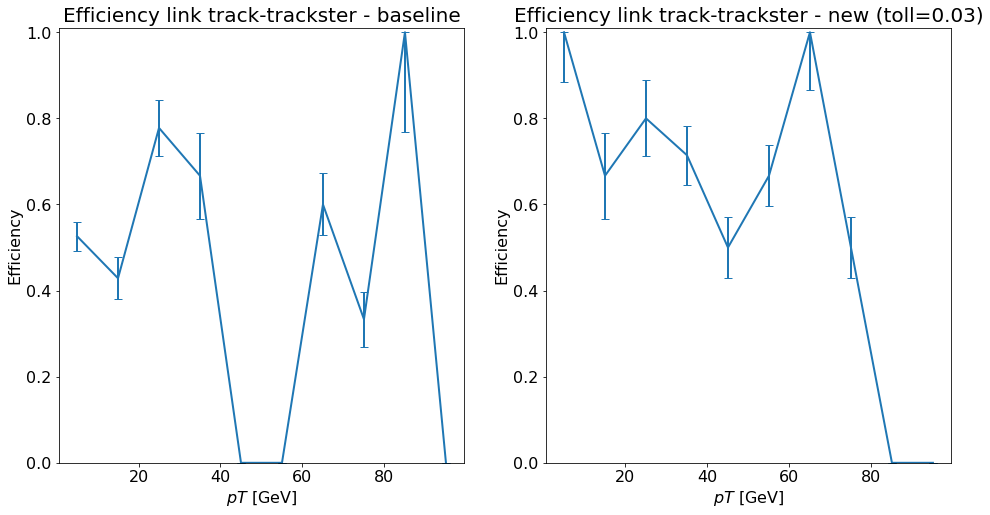

In [64]:
# hN, edgeX = np.histogram(numeratorEnergy, bins = 10, range = (0,max(denominatorEnergy)))
# hD, edgeX = np.histogram(denominatorEnergy, bins = 10, range = (0, max(denominatorEnergy)))
uflow = False
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8))
# fig, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(42,17))

# hN, uN, cN, eN = extended_hist(np.array(numeratorEnergy)[mask], nbins = 10, range = (0,max(denominatorEnergy)), underflow = uflow, overflow = uflow)
# hD, uD, cD, eD = extended_hist(np.array(denominatorEnergy)[maskD], nbins = 10, range = (0,max(denominatorEnergy)), underflow = uflow, overflow = uflow)
# errs = computeErrorRatio(hN,hD,uN,uD)
# ax0.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
# ax0.set_xlabel("Raw Energy [GeV]")
# ax0.set_ylabel("Efficiency - Simclusters")
# ax0.set_ylim(0,1.01)
# # hep.cms.text('Preliminary')
# ax0.set_title("Efficiency - SimClusters")

hN, uN, cN, eN = extended_hist(np.array(base_numeratorPt), nbins = 10, range = (0, 100), underflow = uflow, overflow = uflow)
hD, uD, cD, eD = extended_hist(np.array(base_denominatorPt), nbins = 10, range = (0, 100), underflow = uflow, overflow = uflow)
errs = computeErrorRatio(hN,hD,uN,uD)
ax1.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
ax1.set_xlabel("$pT$ [GeV]")
ax1.set_ylabel("Efficiency")
ax1.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax1.set_title("Efficiency link track-trackster - baseline")

hN, uN, cN, eN = extended_hist(np.array(new_numeratorPt), nbins = 10, range = (0, 100), underflow = uflow, overflow = uflow)
hD, uD, cD, eD = extended_hist(np.array(new_denominatorPt), nbins = 10, range = (0, 100), underflow = uflow, overflow = uflow)
errs = computeErrorRatio(hN,hD,uN,uD)
ax2.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
ax2.set_xlabel("$pT$ [GeV]")
ax2.set_ylabel("Efficiency")
ax2.set_ylim(0,1.01)
# hep.cms.text('Preliminary')
ax2.set_title("Efficiency link track-trackster - new (toll=0.03)")


# hN, uN, cN, eN = extended_hist(np.array(numeratorEta)[mask], nbins = 10, range = (1.5,3.0), underflow = uflow, overflow = uflow)
# hD, uD, cD, eD = extended_hist(np.array(denominatorEta)[maskD], nbins = 10, range = (1.5,3.0), underflow = uflow, overflow = uflow)
# errs = computeErrorRatio(hN,hD,uN,uD)
# ax3.errorbar(cD, hN/hD, yerr=errs, capsize = 4, lw = 2)
# ax3.set_xlabel("$\eta$ [GeV]")
# ax3.set_ylabel("Efficiency - Simclusters")
# ax3.set_ylim(0,1.01)
# # hep.cms.text('Preliminary')
# ax3.set_title("Efficiency - SimClusters")

### plots

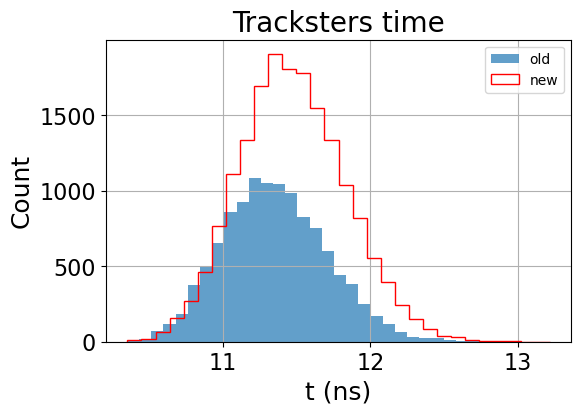

In [20]:
plt.figure(dpi=100)
plt.hist(ak.flatten(reco_CALO_time[reco_CALO_time>-99]), bins=30, label='old', alpha=.7)
plt.hist(ak.flatten(new_bt), bins=30, label='new', color='r', histtype='step')
plt.grid()
plt.legend()
plt.title('Tracksters time')
plt.xlabel('t (ns)', size=18)
plt.ylabel('Count', size=18)
plt.show()

## Plot the times

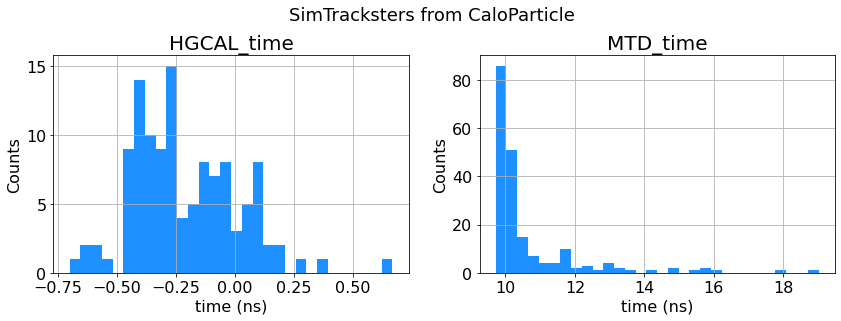

In [100]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14,4))
fig.suptitle('SimTracksters from CaloParticle', size=18, y=1.05)

subplot(axs[0], CALO_time, title='HGCAL_time')
axs[0].set_title('HGCAL_time')
subplot(axs[1], ETL_time, title='MTD_time')
#subplot(axs[0], CP_boundary_time, title='boundary_time')

for ax in axs.flat:
    ax.set_xlabel('time (ns)', fontsize = 16.0)    
    ax.set_ylabel('Counts', fontsize = 16.0)

## Visual representation

In [11]:
%matplotlib widget
eid = 1

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("x (cm)")
ax1.set_ylabel("z (cm)")
ax1.set_zlabel("y (cm)")

ax1.set_xlim(ak.min(vx[eid]), ak.max(vx[eid]))
ax1.set_zlim(ak.min(vy[eid]), ak.max(vy[eid]))
ax1.set_ylim(ak.min(vz[eid]), ak.max(vz[eid]))

for x, y, z, e in zip(vx[eid], vy[eid], vz[eid], ve[eid]):
    ax1.scatter(x, z, y, s=8*e)

ax1.set_title(f"SimTrackster layer-clusters ({len(vx[eid])} Trackster)")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
import matplotlib as mpl
cmap = mpl.cm.get_cmap('gist_rainbow')

In [26]:
%matplotlib widget
eid=0

C = 29.9792458 #ns/cm

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("x (cm)")
ax1.set_ylabel("z (cm)")
ax1.set_zlabel("y (cm)")

# ax1.set_xlim(ak.min(vx[eid]), ak.max(vx[eid]))
# ax1.set_zlim(ak.min(vy[eid]), ak.max(vy[eid]))
# ax1.set_ylim(ak.min(vz[eid]), ak.max(vz[eid]))

x = ak.flatten(vx[vt>-99.][eid])
y = ak.flatten(vy[vt>-99.][eid])
z = ak.flatten(vz[vt>-99.][eid])
e = ak.flatten(ve[vt>-99.][eid])
t = ak.flatten(vt[vt>-99.][eid])

x = vx[vt>-99.][eid][tr_id]
y = vy[vt>-99.][eid][tr_id]
z = vz[vt>-99.][eid][tr_id]
e = ve[vt>-99.][eid][tr_id]
t = vt[vt>-99.][eid][tr_id]

img = ax1.scatter(x, z, y, s=20*e, alpha=0.5, c=t, cmap=mpl.cm.get_cmap('gist_rainbow'))

tempi = np.linspace(min(t), max(t), 4)

fig.colorbar(img, location='left', ticks=tempi, format='%0.2f',fraction=0.03, pad=0.04)
ax1.set_title(f"RecoTrackster layer-clusters with time (ns)")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …